In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
import scipy.signal as sp
import pandas as pd

In [2]:
plt.rcParams["figure.figsize"] = (15,6)

In [3]:
df = pd.read_csv(r'data\Accelerometer_3d.csv')
time = df['Time (s)'].to_numpy()
df.set_index('Time (s)', inplace=True)
df.head()

,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
Time (s),,,,
0.000000,0.197749,0.084921,9.827211,9.829568
0.005007,0.202540,0.094503,9.911055,9.913574
0.010043,0.173794,0.106480,9.846375,9.848485
0.015080,0.188167,0.132831,9.889495,9.892177
0.020117,0.173794,0.065757,9.896681,9.898425


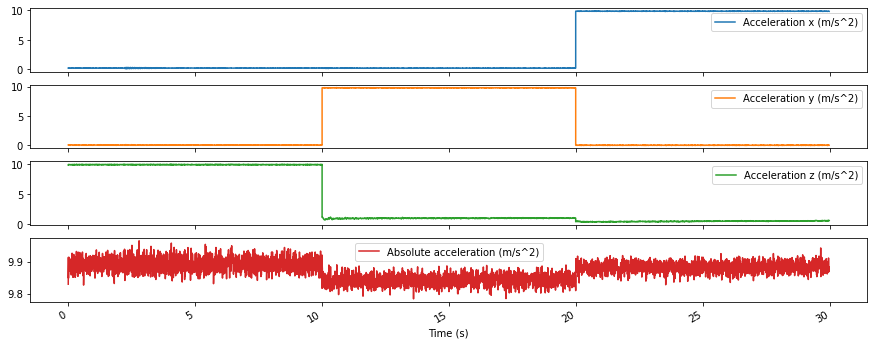

In [4]:
df.plot(subplots=True);

In [5]:
df['acc_x_fft'] = fft(df['Acceleration x (m/s^2)'])
df['acc_y_fft'] = fft(df['Acceleration y (m/s^2)'])
df['acc_z_fft'] = fft(df['Acceleration z (m/s^2)'])
df['acc_abs_fft'] = fft(df['Absolute acceleration (m/s^2)'])

df.head()

,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2),acc_x_fft,acc_y_fft,acc_z_fft,acc_abs_fft
Time (s),,,,,,,,
0.000000,0.197749,0.084921,9.827211,9.829568,20345.472177+0.000000j,19636.373049+0.000000j,22618.778114+0.000000j,58772.993802+0.000000j
0.005007,0.202540,0.094503,9.911055,9.913574,7951.667286+13734.307162j,-15975.238535-33.973856j,6914.949617-13361.293355j,74.005601-14.417933j
0.010043,0.173794,0.106480,9.846375,9.848485,-3979.777069+6876.457417j,7989.639811-40.183936j,-3371.085147-6664.089549j,-35.714566-9.312074j
0.015080,0.188167,0.132831,9.889495,9.892177,-11.605488-1.633852j,-1.353836-0.608680j,5.518196+69.867255j,0.410482+1.489502j
0.020117,0.173794,0.065757,9.896681,9.898425,1988.569965+3427.576551j,-3992.611799+3.304249j,1708.636821-3340.708729j,17.723788-3.576243j


c:\users\harshil\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\harshil\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\harshil\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\harshil\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


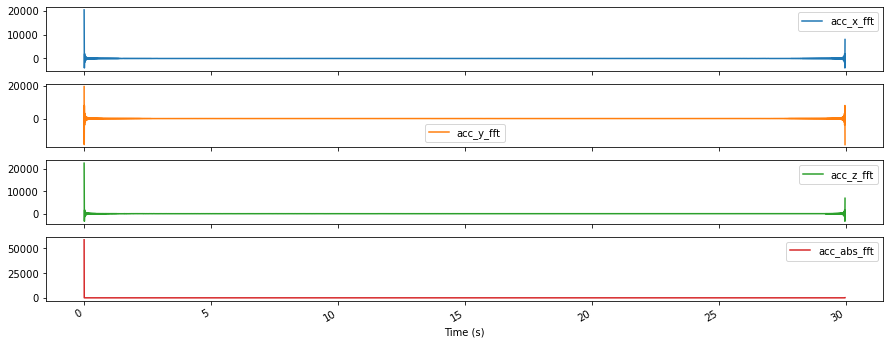

In [6]:
df.plot(y=["acc_x_fft", "acc_y_fft", "acc_z_fft", "acc_abs_fft"], subplots=True);

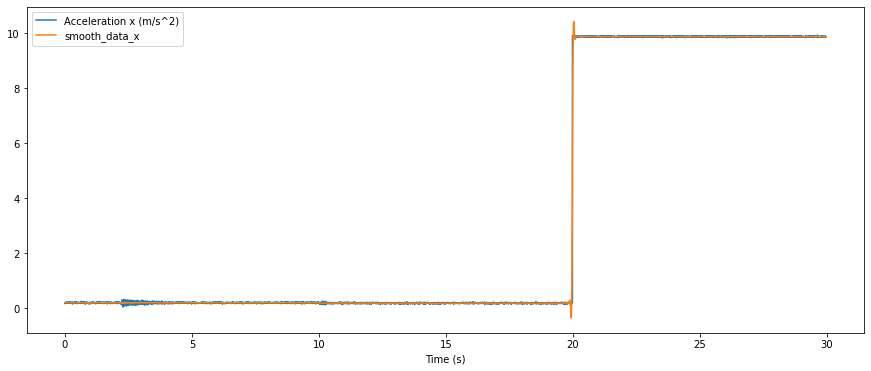

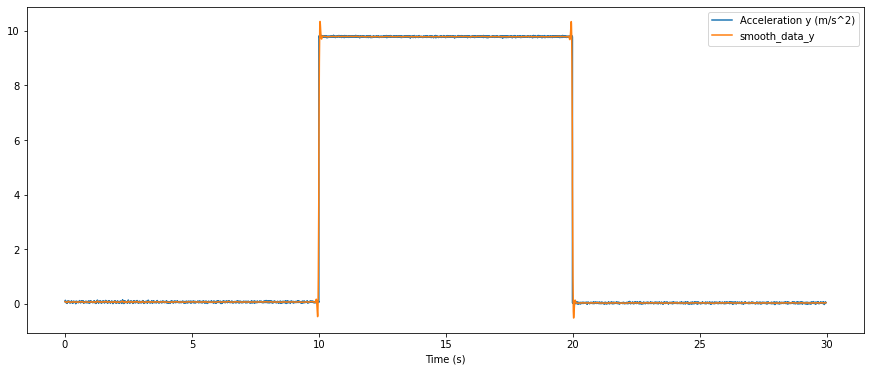

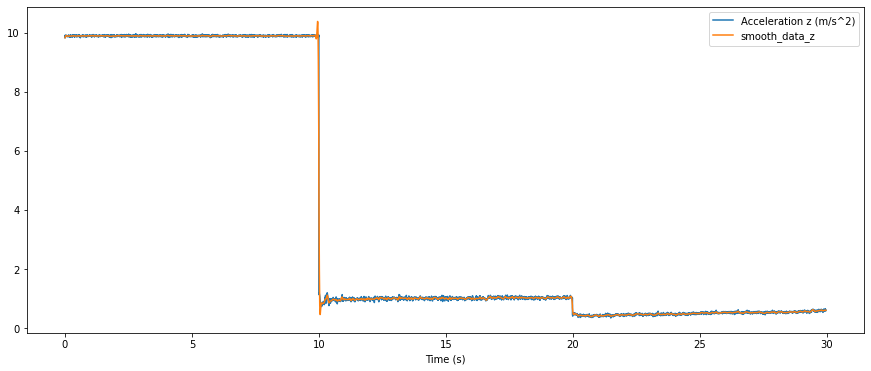

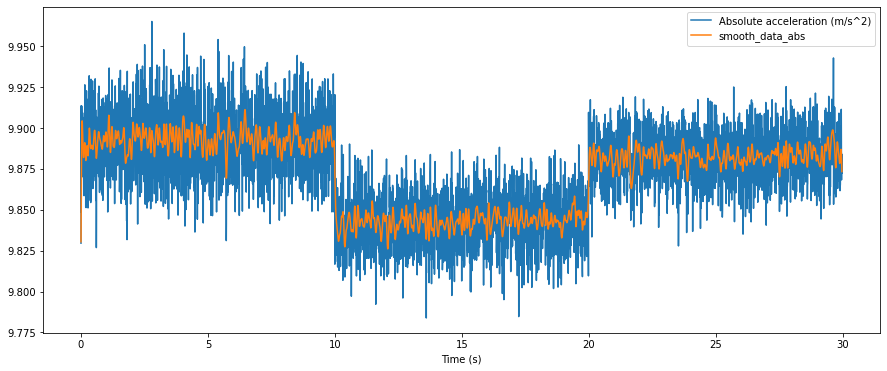

In [7]:
N = 3
Wn = 0.1
b, a = sp.butter(N, Wn)
df['smooth_data_x'] = sp.filtfilt(b, a, df['Acceleration x (m/s^2)'])
df['smooth_data_y'] = sp.filtfilt(b, a, df['Acceleration y (m/s^2)'])
df['smooth_data_z'] = sp.filtfilt(b, a, df['Acceleration z (m/s^2)'])
df['smooth_data_abs'] = sp.filtfilt(b, a, df['Absolute acceleration (m/s^2)'])

df.plot(y=["Acceleration x (m/s^2)", "smooth_data_x"]);
df.plot(y=["Acceleration y (m/s^2)", "smooth_data_y"]);
df.plot(y=["Acceleration z (m/s^2)", "smooth_data_z"]);
df.plot(y=["Absolute acceleration (m/s^2)", "smooth_data_abs"]);

In [8]:
df.head()

,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2),acc_x_fft,acc_y_fft,acc_z_fft,acc_abs_fft,smooth_data_x,smooth_data_y,smooth_data_z,smooth_data_abs
Time (s),,,,,,,,,,,,
0.000000,0.197749,0.084921,9.827211,9.829568,20345.472177+0.000000j,19636.373049+0.000000j,22618.778114+0.000000j,58772.993802+0.000000j,0.198630,0.085218,9.828080,9.830458
0.005007,0.202540,0.094503,9.911055,9.913574,7951.667286+13734.307162j,-15975.238535-33.973856j,6914.949617-13361.293355j,74.005601-14.417933j,0.198389,0.084422,9.842398,9.844770
0.010043,0.173794,0.106480,9.846375,9.848485,-3979.777069+6876.457417j,7989.639811-40.183936j,-3371.085147-6664.089549j,-35.714566-9.312074j,0.198373,0.083352,9.856073,9.858441
0.015080,0.188167,0.132831,9.889495,9.892177,-11.605488-1.633852j,-1.353836-0.608680j,5.518196+69.867255j,0.410482+1.489502j,0.198738,0.081813,9.868522,9.870890
0.020117,0.173794,0.065757,9.896681,9.898425,1988.569965+3427.576551j,-3992.611799+3.304249j,1708.636821-3340.708729j,17.723788-3.576243j,0.199571,0.079684,9.879277,9.881649


In [9]:
df[:10].mean()

Acceleration x (m/s^2)             0.201125+0.000000j
Acceleration y (m/s^2)             0.076103+0.000000j
Acceleration z (m/s^2)             9.886070+0.000000j
Absolute acceleration (m/s^2)      9.892790+0.000000j
acc_x_fft                         7.822878+39.309766j
acc_y_fft                          5.052552-0.153607j
acc_z_fft                        18.154482-37.877858j
acc_abs_fft                       29.557596-0.047101j
smooth_data_x                      0.201144+0.000000j
smooth_data_y                      0.079049+0.000000j
smooth_data_z                      9.883400+0.000000j
smooth_data_abs                    9.892744+0.000000j
dtype: complex128

In [10]:
df[:20].mean()

Acceleration x (m/s^2)             0.202153+0.000000j
Acceleration y (m/s^2)             4.924392+0.000000j
Acceleration z (m/s^2)             5.445590+0.000000j
Absolute acceleration (m/s^2)      9.867983+0.000000j
acc_x_fft                         1.497663+19.656215j
acc_y_fft                          2.542838-0.076986j
acc_z_fft                        11.345269-18.939170j
acc_abs_fft                       14.738667-0.022679j
smooth_data_x                      0.202180+0.000000j
smooth_data_y                      4.924362+0.000000j
smooth_data_z                      5.445571+0.000000j
smooth_data_abs                    9.867960+0.000000j
dtype: complex128

In [11]:
df[10:20].mean()

Acceleration x (m/s^2)           0.203181+0.000000j
Acceleration y (m/s^2)           9.775122+0.000000j
Acceleration z (m/s^2)           1.002874+0.000000j
Absolute acceleration (m/s^2)    9.843163+0.000000j
acc_x_fft                       -4.830737-0.007232j
acc_y_fft                        0.031861-0.000327j
acc_z_fft                        4.532627+0.009054j
acc_abs_fft                     -0.087725+0.001755j
smooth_data_x                    0.203216+0.000000j
smooth_data_y                    9.772114+0.000000j
smooth_data_z                    1.005507+0.000000j
smooth_data_abs                  9.843164+0.000000j
dtype: complex128

In [12]:
df[20:].mean()

Acceleration x (m/s^2)            9.869858+0.000000j
Acceleration y (m/s^2)            0.036245+0.000000j
Acceleration z (m/s^2)            0.496692+0.000000j
Absolute acceleration (m/s^2)     9.882575+0.000000j
acc_x_fft                       -2.410615-39.441486j
acc_y_fft                        -4.847053+0.154478j
acc_z_fft                        6.781129+38.002688j
acc_abs_fft                      -0.020862+0.045507j
smooth_data_x                     9.869815+0.000000j
smooth_data_y                     0.036269+0.000000j
smooth_data_z                     0.496679+0.000000j
smooth_data_abs                   9.882566+0.000000j
dtype: complex128

In [13]:
df_error = df.copy()
df_error.drop(['acc_x_fft', 'acc_y_fft', 'acc_z_fft', 'acc_abs_fft'], axis=1, inplace=True)

df_error['err_x'] = df_error['smooth_data_x']
df_error['err_y'] = df_error['smooth_data_y']
df_error['err_z'] = df_error['smooth_data_z']

df_error.loc[:20, 'err_x'] -= 0.202180 
df_error.loc[20:, 'err_x'] -= 9.869815

df_error.loc[:10, 'err_y'] -= 0.079049
df_error.loc[10:20, 'err_y'] -= 9.772114
df_error.loc[20:, 'err_y'] -= 0.036269

df_error.loc[:10, 'err_z'] -= 9.883400
df_error.loc[10:20, 'err_z'] -= 1.005507
df_error.loc[20:, 'err_z'] -= 0.496679

print('Mean error in X:', df_error['err_x'].mean())
print('Mean error in Y:', df_error['err_y'].mean())
print('Mean error in Z:', df_error['err_z'].mean())

df_error

Mean error in X: -1.5179263790699745e-08
Mean error in Y: 2.8375933929754746e-07
Mean error in Z: 9.266386652370125e-08


,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2),smooth_data_x,smooth_data_y,smooth_data_z,smooth_data_abs,err_x,err_y,err_z
Time (s),,,,,,,,,,,
0.000000,0.197749,0.084921,9.827211,9.829568,0.198630,0.085218,9.828080,9.830458,-0.003550,0.006169,-0.055320
0.005007,0.202540,0.094503,9.911055,9.913574,0.198389,0.084422,9.842398,9.844770,-0.003791,0.005373,-0.041002
0.010043,0.173794,0.106480,9.846375,9.848485,0.198373,0.083352,9.856073,9.858441,-0.003807,0.004303,-0.027327
0.015080,0.188167,0.132831,9.889495,9.892177,0.198738,0.081813,9.868522,9.870890,-0.003442,0.002764,-0.014878
0.020117,0.173794,0.065757,9.896681,9.898425,0.199571,0.079684,9.879277,9.881649,-0.002609,0.000635,-0.004123
...,...,...,...,...,...,...,...,...,...,...,...
29.949336,9.868381,0.056175,0.642864,9.889458,9.865306,0.044649,0.607844,9.884142,-0.004509,0.008380,0.111165
29.954373,9.849217,0.041802,0.611723,9.868284,9.863214,0.045363,0.607055,9.882003,-0.006601,0.009094,0.110376
29.959410,9.865986,0.065757,0.594954,9.884127,9.860688,0.045690,0.605823,9.879400,-0.009127,0.009421,0.109144


In [14]:
df_error['Corrected_x'] = df_error['smooth_data_x'] - df_error['err_x']
df_error['Corrected_y'] = df_error['smooth_data_y'] - df_error['err_y']
df_error['Corrected_z'] = df_error['smooth_data_z'] - df_error['err_z']

df_error.head()

,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2),smooth_data_x,smooth_data_y,smooth_data_z,smooth_data_abs,err_x,err_y,err_z,Corrected_x,Corrected_y,Corrected_z
Time (s),,,,,,,,,,,,,,
0.000000,0.197749,0.084921,9.827211,9.829568,0.198630,0.085218,9.828080,9.830458,-0.003550,0.006169,-0.055320,0.20218,0.079049,9.8834
0.005007,0.202540,0.094503,9.911055,9.913574,0.198389,0.084422,9.842398,9.844770,-0.003791,0.005373,-0.041002,0.20218,0.079049,9.8834
0.010043,0.173794,0.106480,9.846375,9.848485,0.198373,0.083352,9.856073,9.858441,-0.003807,0.004303,-0.027327,0.20218,0.079049,9.8834
0.015080,0.188167,0.132831,9.889495,9.892177,0.198738,0.081813,9.868522,9.870890,-0.003442,0.002764,-0.014878,0.20218,0.079049,9.8834
0.020117,0.173794,0.065757,9.896681,9.898425,0.199571,0.079684,9.879277,9.881649,-0.002609,0.000635,-0.004123,0.20218,0.079049,9.8834


(9.7, 10.45)

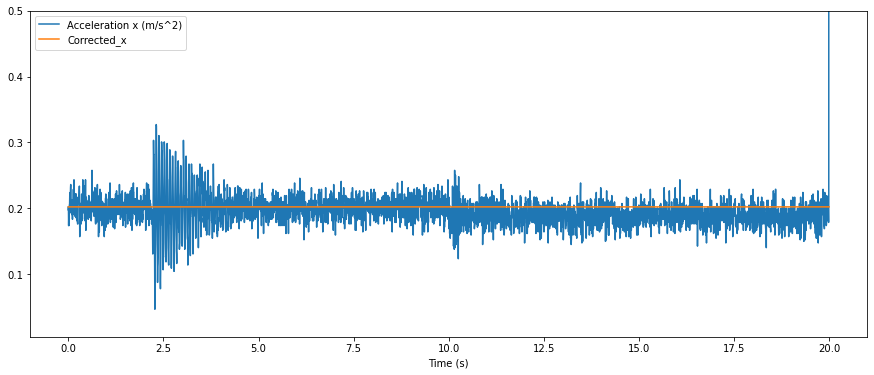

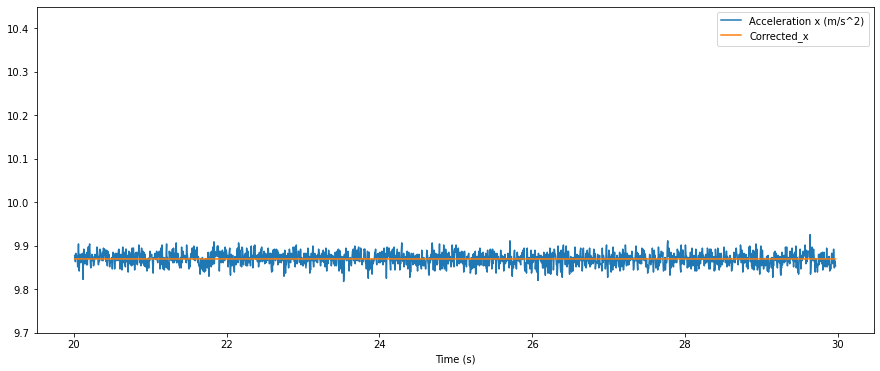

In [15]:
ax1 = df_error.loc[:20].plot(y=["Acceleration x (m/s^2)", "Corrected_x"])
ax1.set_ylim(0.005, 0.5)

ax2 = df_error.loc[20.01:].plot(y=["Acceleration x (m/s^2)", "Corrected_x"])
ax2.set_ylim(9.7, 10.45)


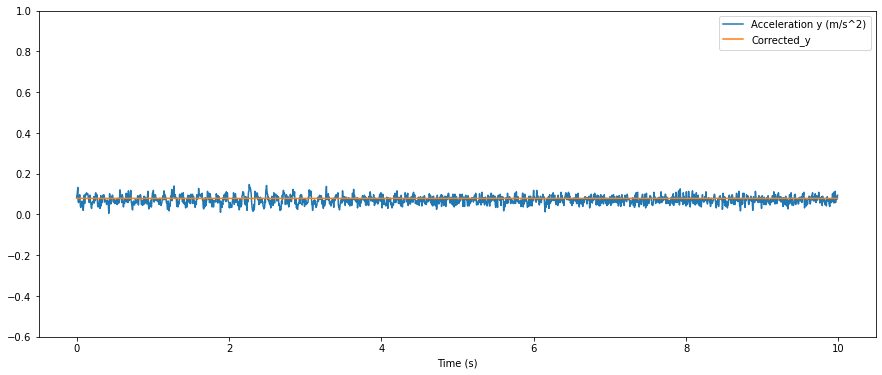

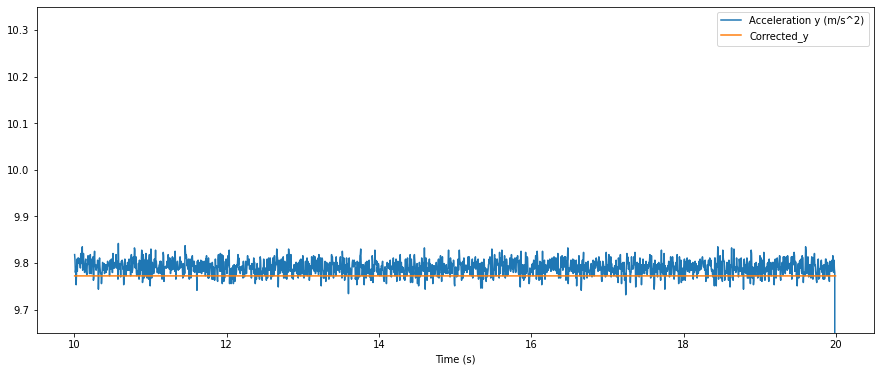

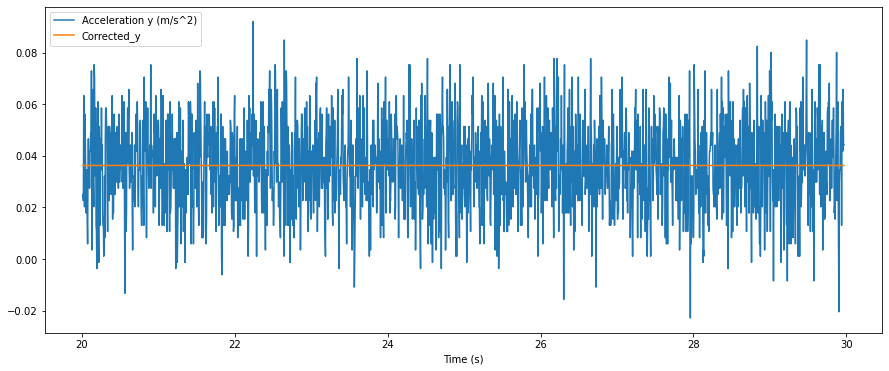

In [16]:
ay1 = df_error.loc[:9.99].plot(y=["Acceleration y (m/s^2)", "Corrected_y"])
ay1.set_ylim(-0.6, 1)

ay2 = df_error.loc[10:20].plot(y=["Acceleration y (m/s^2)", "Corrected_y"])
ay2.set_ylim(9.65, 10.35)

df_error.loc[20.01:].plot(y=["Acceleration y (m/s^2)", "Corrected_y"])

(0.2, 1.5)

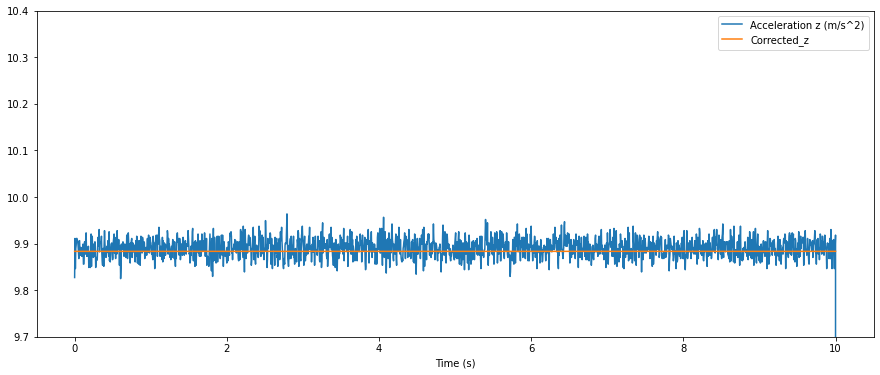

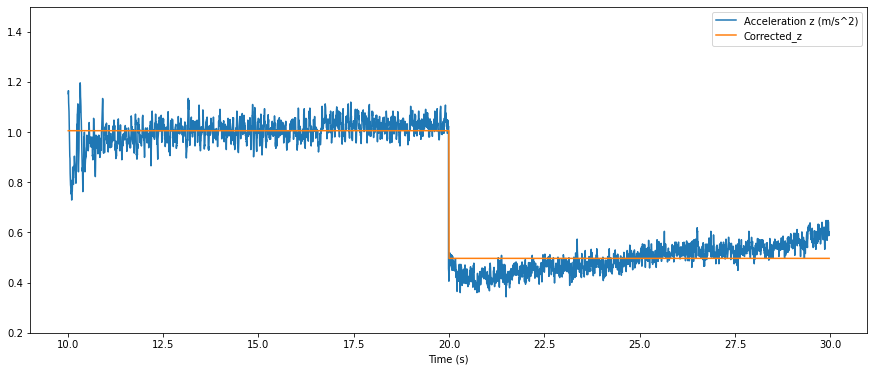

In [17]:
az1 = df_error.loc[:10].plot(y=["Acceleration z (m/s^2)", "Corrected_z"])
az1.set_ylim(9.7, 10.4)

az2 = df_error.loc[10.01:].plot(y=["Acceleration z (m/s^2)", "Corrected_z"])
az2.set_ylim(0.2, 1.5)

In [18]:
df['SMA_x'] = df.loc[:, 'smooth_data_x'].rolling(window=3).mean()
df['SMA_y'] = df.loc[:, 'smooth_data_y'].rolling(window=3).mean()
df['SMA_z'] = df.loc[:, 'smooth_data_z'].rolling(window=3).mean()
df['SMA_x'].loc[20:]

Time (s)
20.001427    7.401953
20.006464    8.209034
20.011500    8.893014
20.016537    9.442037
20.021574    9.855261
               ...   
29.949336    9.866661
29.954373    9.865127
29.959410    9.863069
29.964447    9.860585
29.969485    9.857799
Name: SMA_x, Length: 1980, dtype: float64

In [19]:
df.dropna(inplace=True)
df.head()

,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2),acc_x_fft,acc_y_fft,acc_z_fft,acc_abs_fft,smooth_data_x,smooth_data_y,smooth_data_z,smooth_data_abs,SMA_x,SMA_y,SMA_z
Time (s),,,,,,,,,,,,,,,
0.010043,0.173794,0.106480,9.846375,9.848485,-3979.777069+6876.457417j,7989.639811-40.183936j,-3371.085147-6664.089549j,-35.714566-9.312074j,0.198373,0.083352,9.856073,9.858441,0.198464,0.084331,9.842184
0.015080,0.188167,0.132831,9.889495,9.892177,-11.605488-1.633852j,-1.353836-0.608680j,5.518196+69.867255j,0.410482+1.489502j,0.198738,0.081813,9.868522,9.870890,0.198500,0.083196,9.855664
0.020117,0.173794,0.065757,9.896681,9.898425,1988.569965+3427.576551j,-3992.611799+3.304249j,1708.636821-3340.708729j,17.723788-3.576243j,0.199571,0.079684,9.879277,9.881649,0.198894,0.081616,9.867957
0.025154,0.192958,0.058570,9.911055,9.913106,-1591.740707+2757.968920j,3197.454253-26.091832j,-1354.500578-2675.732219j,-13.957706-1.474571j,0.200872,0.076933,9.888015,9.890397,0.199727,0.079477,9.878605
0.030191,0.204935,0.075339,9.911055,9.913459,-12.657358-0.430744j,-2.635855-2.413064j,12.315340+36.654748j,-0.416871+1.285806j,0.202561,0.073610,9.894579,9.896973,0.201001,0.076742,9.887290


(9.7, 10.45)

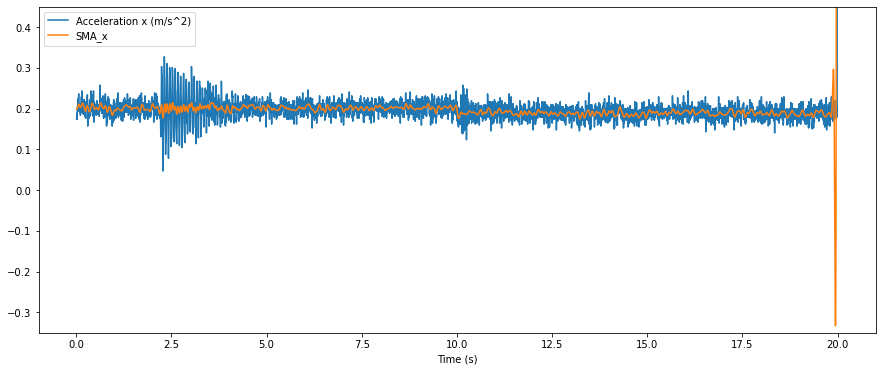

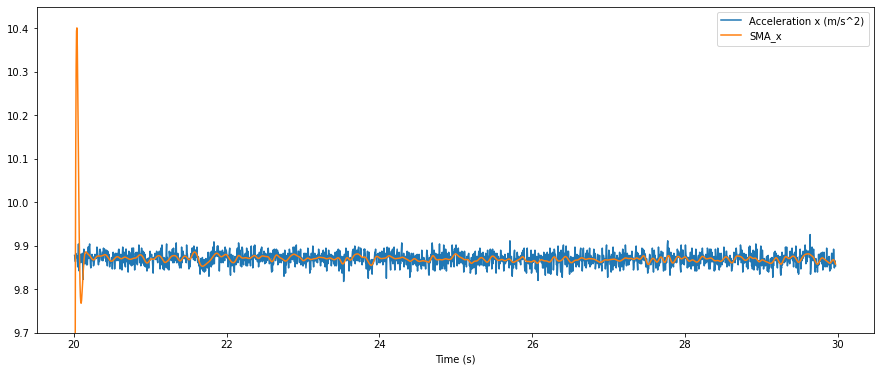

In [20]:
ax1 = df.loc[:20].plot(y=["Acceleration x (m/s^2)", "SMA_x"])
ax1.set_ylim(-0.35, 0.45)

ax2 = df.loc[20.01:].plot(y=["Acceleration x (m/s^2)", "SMA_x"])
ax2.set_ylim(9.7, 10.45)

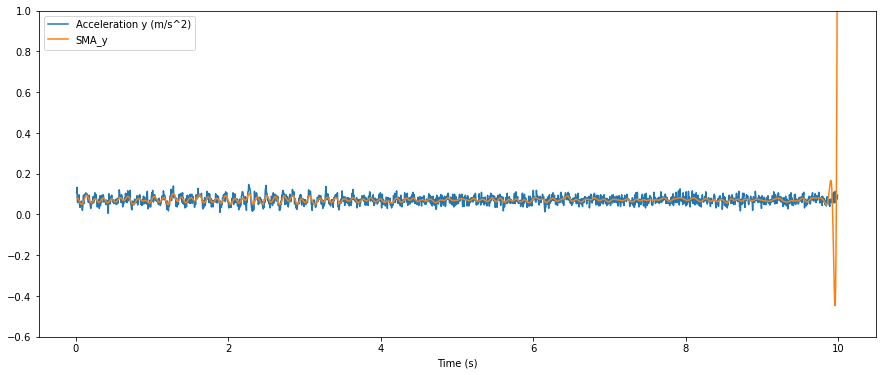

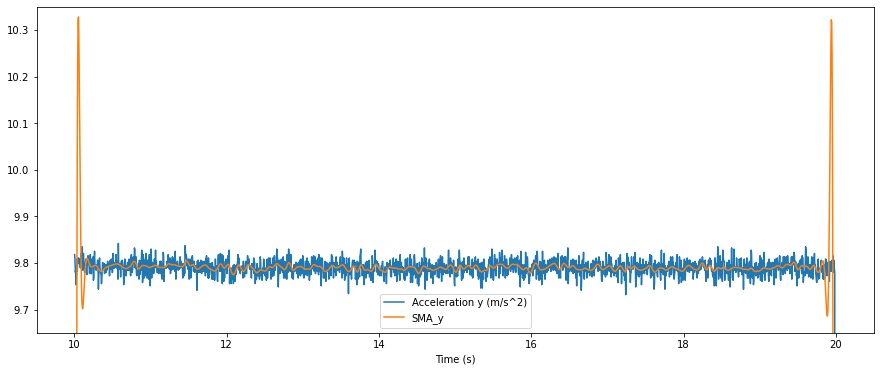

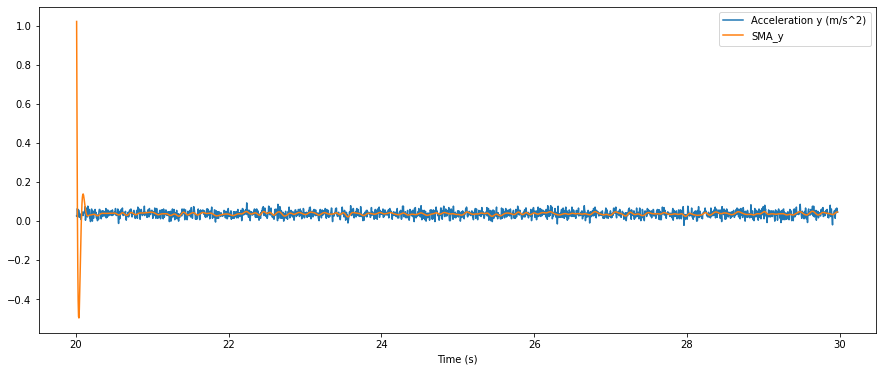

In [21]:
ay1 = df.loc[:9.99].plot(y=["Acceleration y (m/s^2)", "SMA_y"])
ay1.set_ylim(-0.6, 1)

ay2 = df.loc[10:20].plot(y=["Acceleration y (m/s^2)", "SMA_y"])
ay2.set_ylim(9.65, 10.35)

df.loc[20.01:].plot(y=["Acceleration y (m/s^2)", "SMA_y"])

(0.2, 1.5)

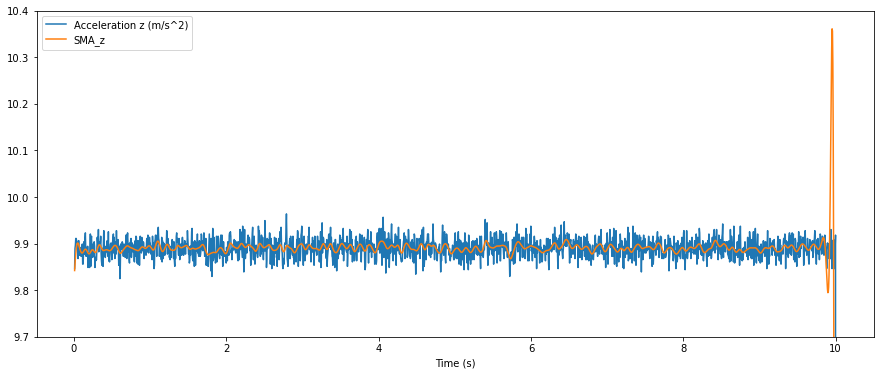

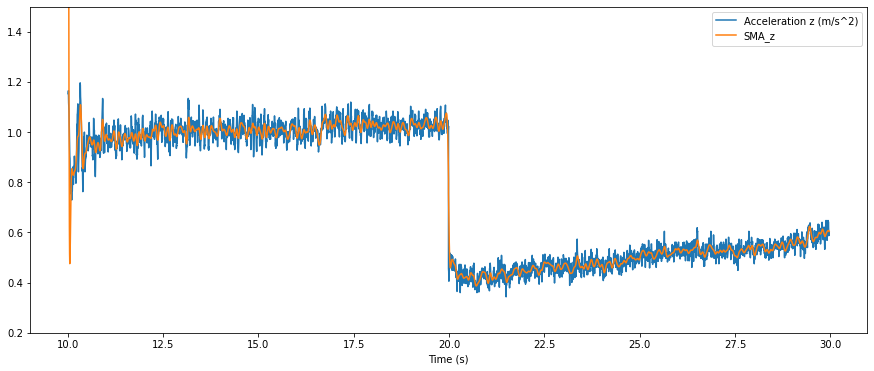

In [22]:
az1 = df.loc[:10].plot(y=["Acceleration z (m/s^2)", "SMA_z"])
az1.set_ylim(9.7, 10.4)

az2 = df.loc[10.01:].plot(y=["Acceleration z (m/s^2)", "SMA_z"])
az2.set_ylim(0.2, 1.5)